### Import and Utils

In [2]:
import numpy as np
import pandas as pd
import winsound
from numpy import trapz
import math


In [7]:
filetype = '_test'
comorbidity_option = 'group'

source_file = f'../champ_result/all_beta_normalized{filetype}.csv'
dest_file = f'../result/all_beta_normalized_result{filetype}_{comorbidity_option}.csv'

In [8]:
df=pd.read_csv(source_file)
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

### Add ID and gene for each marker

In [9]:
DMP_result = pd.read_csv(f'../champ_result/DMP_result{filetype}.csv')
DMP_result.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
df_gene = pd.merge(DMP_result[['ID','gene']], df,on='ID')
print(df_gene.shape)
df_gene.head(9)

(296910, 902)


,ID,gene,1,2,3,4,5,6,7,8,...,891,892,893,894,895,896,897,898,899,900
0,cg19533977,CLTC,0.447902,0.447902,0.394753,0.394753,0.406620,0.406620,0.468155,0.468155,...,0.062554,0.062554,0.034546,0.034546,0.044163,0.044163,0.022938,0.022938,0.146468,0.146468
1,cg18265162,C1orf133,0.296024,0.296024,0.377015,0.377015,0.367902,0.367902,0.501212,0.501212,...,0.037592,0.037592,0.041314,0.041314,0.098546,0.098546,0.056956,0.056956,0.057265,0.057265
2,cg18269493,RERE,0.544779,0.544779,0.399555,0.399555,0.582932,0.582932,0.442471,0.442471,...,0.084276,0.084276,0.103839,0.103839,0.156181,0.156181,0.095552,0.095552,0.164321,0.164321
3,cg08296903,ERCC4,0.683632,0.683632,0.692476,0.692476,0.814200,0.814200,0.793082,0.793082,...,0.969104,0.969104,0.910856,0.910856,0.943632,0.943632,0.953642,0.953642,0.934749,0.934749
4,cg01817009,SLC12A4,0.717603,0.717603,0.707830,0.707830,0.729603,0.729603,0.799428,0.799428,...,0.952065,0.952065,0.929213,0.929213,0.939227,0.939227,0.941443,0.941443,0.931484,0.931484
5,cg23690893,TECR,0.533689,0.533689,0.501678,0.501678,0.468891,0.468891,0.521698,0.521698,...,0.808579,0.808579,0.875189,0.875189,0.855856,0.855856,0.889267,0.889267,0.595270,0.595270
6,cg17046586,LIMA1,0.581965,0.581965,0.671771,0.671771,0.533835,0.533835,0.616017,0.616017,...,0.925494,0.925494,0.817558,0.817558,0.913358,0.913358,0.909223,0.909223,0.898653,0.898653
7,cg25198340,IL17RD,0.629386,0.629386,0.693767,0.693767,0.578292,0.578292,0.715518,0.715518,...,0.910863,0.910863,0.910969,0.910969,0.896399,0.896399,0.913855,0.913855,0.899909,0.899909
8,cg24541176,TMEM106C,0.693264,0.693264,0.733966,0.733966,0.747631,0.747631,0.697207,0.697207,...,0.939644,0.939644,0.800803,0.800803,0.940829,0.940829,0.919373,0.919373,0.950279,0.950279


### Intersect with comorbidity gene list (ignored)

directly intersect with train single/group results instead

In [102]:
# single = pd.read_csv('../comorbidity/matchgene174_single_3Y10__OR2.txt', sep='\t', header=None)
# group = pd.read_csv('../comorbidity/matchgene174_group_3Y10__OR2.txt', sep='\t', header=None)
# df_single = df_gene[df_gene['gene'].isin(single[0])]
# df_group = df_gene[df_gene['gene'].isin(group[0])]

In [103]:
# print(df_single.shape)
# df_single.head(9)    

### Intersect with train result

Test data intersect with train result to only keep the markers in the train result<br>
Train result intersect with test data to only keep the markers in the test data

In [10]:
cp_file = f'../result/all_beta_normalized_result_{comorbidity_option}.csv'

In [60]:
df_cp = pd.read_csv(cp_file)
df_gene = df_gene[df_gene['ID'].isin(df_cp['ID'])]
print(df_gene.shape)
df_gene.head()

(85584, 902)


,ID,gene,1,2,3,4,5,6,7,8,...,891,892,893,894,895,896,897,898,899,900
3,cg08296903,ERCC4,0.683632,0.683632,0.692476,0.692476,0.814200,0.814200,0.793082,0.793082,...,0.969104,0.969104,0.910856,0.910856,0.943632,0.943632,0.953642,0.953642,0.934749,0.934749
6,cg17046586,LIMA1,0.581965,0.581965,0.671771,0.671771,0.533835,0.533835,0.616017,0.616017,...,0.925494,0.925494,0.817558,0.817558,0.913358,0.913358,0.909223,0.909223,0.898653,0.898653
7,cg25198340,IL17RD,0.629386,0.629386,0.693767,0.693767,0.578292,0.578292,0.715518,0.715518,...,0.910863,0.910863,0.910969,0.910969,0.896399,0.896399,0.913855,0.913855,0.899909,0.899909
11,cg19366479,NR1H2,0.528947,0.528947,0.607069,0.607069,0.500762,0.500762,0.693534,0.693534,...,0.943357,0.943357,0.805556,0.805556,0.899682,0.899682,0.919974,0.919974,0.926966,0.926966
12,cg19130973,IQSEC1,0.555129,0.555129,0.587392,0.587392,0.575222,0.575222,0.542707,0.542707,...,0.940015,0.940015,0.777668,0.777668,0.847252,0.847252,0.883881,0.883881,0.648303,0.648303


In [61]:
df_cp.shape

(104496, 24)

In [12]:
df_cp = df_cp[df_cp['ID'].isin(df_gene['ID'])]
print(df_cp.shape)
df_cp.head(9)

(85584, 24)


,ID,gene,J,J cut-point,J sensitivity,J specificity,CZ,CZ cut-point,CZ sensitivity,CZ specificity,...,UI,UI cut-point,UI sensitivity,UI specificity,F1,F1 cut-point,F1 sensitivity,F1 specificity,AUC,t_dbeta_avg
0,cg05434287,MAD1L1,0.972362,0.20,1.000000,0.042553,0.972362,0.20,1.000000,0.042553,...,0.051695,0.19,1.000000,0.042553,0.985987,0.20,1.000000,0.042553,0.952208,0.339272
1,cg27616751,FIS1,0.844542,0.15,1.000000,0.234043,0.850529,0.15,1.000000,0.234043,...,0.017909,0.16,1.000000,0.234043,0.922212,0.15,1.000000,0.234043,0.905324,0.225588
3,cg08951958,ABL1,0.822089,0.10,0.997487,0.085106,0.828504,0.10,0.997487,0.085106,...,0.166257,0.13,0.997487,0.085106,0.909400,0.10,0.997487,0.085106,0.807735,0.176497
4,cg17901038,UBE2O,0.880894,0.09,0.997487,0.021277,0.884422,0.09,0.997487,0.021277,...,0.270341,0.15,0.997487,0.021277,0.940427,0.09,0.997487,0.021277,0.746739,0.175790
5,cg18675097,NKAPL,0.964824,0.20,0.992462,0.085106,0.964824,0.20,0.992462,0.085106,...,0.129638,0.11,0.992462,0.085106,0.982097,0.20,0.992462,0.085106,0.863814,0.483104
6,cg22118112,PRPF6,0.798140,0.06,1.000000,0.127660,0.808297,0.06,1.000000,0.127660,...,0.170052,0.05,1.000000,0.127660,0.899037,0.06,1.000000,0.127660,0.799102,0.090638
7,cg17046586,LIMA1,0.812039,0.18,0.994975,0.127660,0.819737,0.18,0.994975,0.127660,...,0.049663,0.22,0.994975,0.127660,0.904768,0.18,0.994975,0.127660,0.918876,0.335394
8,cg05267543,EFNA4,0.676361,0.11,1.000000,0.063830,0.701379,0.11,1.000000,0.063830,...,0.068320,0.11,1.000000,0.063830,0.836788,0.11,1.000000,0.063830,0.823372,-0.127539
9,cg18397073,POU2F2,0.786913,0.18,0.989950,0.170213,0.797819,0.18,0.989950,0.170213,...,0.085588,0.18,0.989950,0.170213,0.892958,0.18,0.989950,0.170213,0.936250,0.294809


In [13]:
normal = df_gene.iloc[:,2:102:2]
tumor = df_gene.iloc[:,102::2]

tumor.columns=range(0,tumor.shape[1])
normal.columns=range(0,normal.shape[1])

# tumor.reset_index(drop=True, inplace=True)
# normal.reset_index(drop=True, inplace=True)

tumor = tumor.T
normal = normal.T 

In [14]:
tumor.head(9)

,3,6,7,11,12,18,19,21,22,24,...,296875,296881,296884,296885,296891,296894,296901,296903,296907,296909
0,0.803038,0.887093,0.913571,0.873649,0.842512,0.882226,0.951230,0.913591,0.844519,0.654474,...,0.059309,0.283943,0.385305,0.026810,0.929437,0.070199,0.949184,0.013062,0.021637,0.047216
1,0.932959,0.953882,0.919249,0.881986,0.907199,0.904003,0.960469,0.910725,0.921636,0.765991,...,0.090569,0.476453,0.824487,0.020971,0.961660,0.054819,0.913011,0.043935,0.029034,0.035259
2,0.944039,0.846006,0.924872,0.896730,0.882344,0.841083,0.948157,0.806691,0.938031,0.738714,...,0.084632,0.435367,0.696155,0.031386,0.939875,0.061172,0.943964,0.019908,0.037167,0.032200
3,0.918712,0.885279,0.868868,0.896896,0.861385,0.844378,0.972800,0.886955,0.852270,0.773863,...,0.063474,0.307614,0.562024,0.027065,0.934069,0.049651,0.929178,0.019115,0.026889,0.024508
4,0.841264,0.923750,0.881785,0.947003,0.909856,0.910490,0.969818,0.934268,0.924813,0.848680,...,0.108478,0.314571,0.778303,0.678723,0.921132,0.051372,0.929732,0.033868,0.022165,0.032828
5,0.948413,0.934837,0.942102,0.894269,0.921489,0.924752,0.950834,0.898067,0.932977,0.874508,...,0.230539,0.434595,0.535077,0.021831,0.745991,0.067481,0.910247,0.024921,0.038522,0.031812
6,0.915386,0.856858,0.833733,0.914614,0.856312,0.850164,0.958281,0.890687,0.913008,0.799100,...,0.118902,0.335679,0.437168,0.021673,0.880738,0.057304,0.950751,0.026518,0.035670,0.026310
7,0.907612,0.893103,0.903223,0.902438,0.914075,0.871752,0.970335,0.886604,0.898540,0.774933,...,0.103069,0.352564,0.783214,0.032874,0.930837,0.041138,0.943923,0.030561,0.022109,0.028828
8,0.922256,0.913218,0.825549,0.859381,0.778413,0.855236,0.939975,0.835836,0.849193,0.772818,...,0.202605,0.372195,0.603471,0.175121,0.971657,0.073651,0.841154,0.012797,0.035776,0.039226


In [15]:
print("filetype: ", filetype)
print("comorbidity_option: ", comorbidity_option)
print('tumor sample count: ', tumor.shape[0])
print('normal sample count: ', normal.shape[0])
print('marker count: ', tumor.shape[1], normal.shape[1])

filetype:  _test
comorbidity_option:  group
tumor sample count:  400
normal sample count:  50
marker count:  85584 85584


### Remove outliers

In [16]:
# Computing IQR
def IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence=Q3+IQR*1.5
    lower_fence=Q1-IQR*1.5
    return upper_fence,lower_fence
def no_outlier(df):
    upper_fence,lower_fence=IQR(df)
    ddf=df[(df>lower_fence)&(df<upper_fence)]
    return ddf

In [17]:
tumor = no_outlier(tumor)
normal = no_outlier(normal)

In [18]:
normal_avg = normal.mean(skipna=True, axis=0)

In [19]:
t_dbeta=(tumor).subtract(normal_avg, axis = 1) 
n_dbeta=(normal).subtract(normal_avg, axis = 1)

In [20]:
print(t_dbeta.shape)
t_dbeta.head(9)

(400, 85584)


,3,6,7,11,12,18,19,21,22,24,...,296875,296881,296884,296885,296891,296894,296901,296903,296907,296909
0,NaN,0.356120,0.318384,0.349404,0.347178,0.363884,0.109333,0.368625,0.208929,0.393370,...,-0.034348,-0.136570,-0.209478,-0.001739,-0.015410,0.001250,0.010874,-0.001764,-0.004887,0.008585
1,0.240043,0.422910,0.324062,0.357741,0.411865,0.385660,0.118572,0.365758,0.286046,0.504887,...,-0.003089,0.055940,0.229704,-0.007579,0.016813,-0.014130,-0.025298,NaN,0.002510,-0.003372
2,0.251123,0.315034,0.329685,0.372485,0.387010,0.322741,0.106260,0.261724,0.302441,0.477609,...,-0.009026,0.014854,0.101372,0.002837,-0.004972,-0.007777,0.005654,0.005082,0.010642,-0.006431
3,0.225797,0.354307,0.273681,0.372651,0.366051,0.326036,0.130903,0.341989,0.216680,0.512758,...,-0.030184,-0.112900,-0.032759,-0.001485,-0.010778,-0.019299,-0.009132,0.004289,0.000364,-0.014123
4,0.148348,0.392778,0.286598,0.422758,0.414521,0.392148,0.127921,0.389301,0.289222,0.587575,...,0.014820,-0.105942,0.183520,NaN,-0.023715,-0.017577,-0.008578,0.019043,-0.004360,-0.005803
5,0.255497,0.403865,0.346915,0.370024,0.426155,0.406410,0.108936,0.353101,0.297386,0.613403,...,0.136881,0.014081,-0.059706,-0.006718,NaN,-0.001468,-0.028062,0.010095,0.011998,-0.006819
6,0.222470,0.325885,0.238546,0.390369,0.360978,0.331822,0.116384,0.345720,0.277417,0.537996,...,0.025244,-0.084834,-0.157615,-0.006876,-0.064109,-0.011646,0.012442,0.011692,0.009146,-0.012321
7,0.214697,0.362131,0.308036,0.378193,0.418741,0.353410,0.128438,0.341638,0.262950,0.513829,...,0.009411,-0.067949,0.188431,0.004324,-0.014010,-0.027811,0.005613,0.015736,-0.004416,-0.009804
8,0.229340,0.382245,0.230362,0.335136,0.283079,0.336893,0.098078,0.290869,0.213603,0.511713,...,0.108947,-0.048318,0.008688,NaN,0.026810,0.004701,NaN,-0.002029,0.009252,0.000595


In [21]:
print(n_dbeta.shape)
n_dbeta.head(9)

(50, 85584)


,3,6,7,11,12,18,19,21,22,24,...,296875,296881,296884,296885,296891,296894,296901,296903,296907,296909
0,-0.009284,0.050993,0.034199,0.004702,0.059795,0.073911,0.042457,0.101230,-0.021605,0.197593,...,-0.006150,0.020353,-0.022216,0.002134,0.017161,-0.002232,0.017043,-0.002914,-0.003692,-0.004024
1,-0.000440,0.140799,0.098580,0.082824,0.092058,0.079832,0.019200,0.065960,0.084670,-0.068631,...,0.037377,-0.077406,-0.063873,0.002929,-0.025845,0.001944,0.003351,0.015642,-0.002182,0.007183
2,0.121284,0.002863,-0.016895,-0.023483,0.079888,0.039721,0.024717,0.062045,0.106433,0.111302,...,0.022272,0.005113,-0.013403,-0.004615,-0.023818,-0.024269,0.025358,0.011931,0.007481,-0.001033
3,0.100167,0.085045,0.120331,0.169289,0.047373,0.153415,0.071231,0.055579,0.079441,0.169626,...,0.001609,0.074616,0.137266,-0.008705,0.028121,-0.010431,0.021091,0.013447,-0.006116,0.000286
4,0.042464,0.035833,-0.062704,-0.091775,-0.034420,-0.036494,-0.047594,-0.046648,-0.030779,0.026083,...,0.030110,0.106573,0.044024,-0.003078,0.010269,-0.014567,0.030382,-0.005004,-0.010657,-0.007872
5,0.087973,0.049640,0.070229,0.071143,0.090776,0.065361,0.001709,0.052009,0.037750,0.153570,...,0.062961,0.065303,0.064941,-0.003510,-0.009246,-0.009455,0.020286,0.004106,-0.008629,0.006131
6,-0.037925,-0.161994,0.004346,0.138026,-0.085881,-0.107954,-0.076990,-0.056780,0.102192,-0.070752,...,NaN,0.065797,0.250747,-0.006213,-0.043428,-0.021640,0.007503,-0.005650,0.009111,0.014839
7,0.033288,-0.016154,-0.020408,-0.061627,0.011529,0.042833,0.089276,0.011890,0.013786,-0.059507,...,-0.032425,0.031893,-0.084786,-0.002168,-0.005214,-0.009528,-0.052287,-0.002149,0.014915,0.001922
8,0.081097,0.103244,0.068989,0.031978,0.065068,0.115225,0.067146,0.076433,0.078302,NaN,...,0.006225,-0.018511,-0.186695,-0.001234,0.010798,-0.012437,0.011638,0.004041,-0.002885,0.018407


### Go through all the cut-point to caculate marker AUC in Test data

In [22]:
all_sen = pd.DataFrame()
all_spe = pd.DataFrame()
for i in np.arange(0.01,1,0.01):
    cp = i.__round__(2)
    TP = (t_dbeta.abs() > cp).sum()
    FN = (t_dbeta.abs() < cp).sum()
    FP = (n_dbeta.abs() > cp).sum()
    TN = (n_dbeta.abs() < cp).sum()
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)

    all_sen = pd.concat([all_sen, sensitivity], ignore_index=True, axis=1)
    all_spe = pd.concat([all_spe, specificity], ignore_index=True, axis=1)  


In [23]:
print(all_sen.shape)
print(all_spe.shape)
all_sen

(85584, 99)
(85584, 99)


,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296894,0.581152,0.253927,0.083770,0.007853,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296901,0.627119,0.350282,0.166667,0.098870,0.050847,0.031073,0.014124,0.002825,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296903,0.160207,0.018088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296907,0.267352,0.046272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
all_spe

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
3,0.180000,0.200000,0.240000,0.400000,0.540000,0.560000,0.600000,0.640000,0.700000,0.740000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,0.063830,0.234043,0.276596,0.382979,0.425532,0.446809,0.553191,0.595745,0.680851,0.702128,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0.163265,0.244898,0.326531,0.387755,0.469388,0.510204,0.612245,0.653061,0.714286,0.775510,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11,0.040000,0.080000,0.160000,0.260000,0.340000,0.400000,0.580000,0.660000,0.740000,0.760000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12,0.106383,0.255319,0.319149,0.404255,0.510638,0.574468,0.723404,0.765957,0.808511,0.893617,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296894,0.413043,0.760870,0.913043,0.978261,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
296901,0.311111,0.577778,0.866667,0.888889,0.955556,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
296903,0.680000,0.960000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
296907,0.714286,0.979592,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### AUC problem unsolved
for now, AUC value is fucked up so union of index(UI) is not accurate

In [25]:
AUC = trapz(y = all_sen[:], x = all_spe[:] - 1 ,axis=1)

In [26]:
print(AUC.shape)
AUC

(85584,)


array([0.81753351, 0.93347555, 0.83524545, ..., 0.025323  , 0.04207544,
       0.05686244])

In [108]:
# # plot ROC curve for a specific CpG site
# import matplotlib.pyplot as plt
# index = int(input('Please input the index of CpG site: '))
# # plt.figure(figsize=(10,10))
# sen_0 = all_sen.iloc[index,:]
# spe_0 = all_spe.iloc[index,:]
# plt.scatter(
#     1 - spe_0, 
#     sen_0, 
#     color='blue', 
#     label='AUC = %0.2f' % AUC[0],
#     lw=2,
#     alpha=0.7
#     )


### Use cut-point from training to caculate sensitivity and specificity
reset index of t_dbeta, n_dbeta, df_cp 

In [27]:
t_dbeta = t_dbeta.T.reset_index(drop=True).T
print(t_dbeta.shape)
t_dbeta.head(6)

(400, 85584)


,0,1,2,3,4,5,6,7,8,9,...,85574,85575,85576,85577,85578,85579,85580,85581,85582,85583
0,NaN,0.356120,0.318384,0.349404,0.347178,0.363884,0.109333,0.368625,0.208929,0.393370,...,-0.034348,-0.136570,-0.209478,-0.001739,-0.015410,0.001250,0.010874,-0.001764,-0.004887,0.008585
1,0.240043,0.422910,0.324062,0.357741,0.411865,0.385660,0.118572,0.365758,0.286046,0.504887,...,-0.003089,0.055940,0.229704,-0.007579,0.016813,-0.014130,-0.025298,NaN,0.002510,-0.003372
2,0.251123,0.315034,0.329685,0.372485,0.387010,0.322741,0.106260,0.261724,0.302441,0.477609,...,-0.009026,0.014854,0.101372,0.002837,-0.004972,-0.007777,0.005654,0.005082,0.010642,-0.006431
3,0.225797,0.354307,0.273681,0.372651,0.366051,0.326036,0.130903,0.341989,0.216680,0.512758,...,-0.030184,-0.112900,-0.032759,-0.001485,-0.010778,-0.019299,-0.009132,0.004289,0.000364,-0.014123
4,0.148348,0.392778,0.286598,0.422758,0.414521,0.392148,0.127921,0.389301,0.289222,0.587575,...,0.014820,-0.105942,0.183520,NaN,-0.023715,-0.017577,-0.008578,0.019043,-0.004360,-0.005803
5,0.255497,0.403865,0.346915,0.370024,0.426155,0.406410,0.108936,0.353101,0.297386,0.613403,...,0.136881,0.014081,-0.059706,-0.006718,NaN,-0.001468,-0.028062,0.010095,0.011998,-0.006819


In [28]:
n_dbeta = n_dbeta.T.reset_index(drop=True).T
print(n_dbeta.shape)
n_dbeta.head(6)

(50, 85584)


,0,1,2,3,4,5,6,7,8,9,...,85574,85575,85576,85577,85578,85579,85580,85581,85582,85583
0,-0.009284,0.050993,0.034199,0.004702,0.059795,0.073911,0.042457,0.101230,-0.021605,0.197593,...,-0.006150,0.020353,-0.022216,0.002134,0.017161,-0.002232,0.017043,-0.002914,-0.003692,-0.004024
1,-0.000440,0.140799,0.098580,0.082824,0.092058,0.079832,0.019200,0.065960,0.084670,-0.068631,...,0.037377,-0.077406,-0.063873,0.002929,-0.025845,0.001944,0.003351,0.015642,-0.002182,0.007183
2,0.121284,0.002863,-0.016895,-0.023483,0.079888,0.039721,0.024717,0.062045,0.106433,0.111302,...,0.022272,0.005113,-0.013403,-0.004615,-0.023818,-0.024269,0.025358,0.011931,0.007481,-0.001033
3,0.100167,0.085045,0.120331,0.169289,0.047373,0.153415,0.071231,0.055579,0.079441,0.169626,...,0.001609,0.074616,0.137266,-0.008705,0.028121,-0.010431,0.021091,0.013447,-0.006116,0.000286
4,0.042464,0.035833,-0.062704,-0.091775,-0.034420,-0.036494,-0.047594,-0.046648,-0.030779,0.026083,...,0.030110,0.106573,0.044024,-0.003078,0.010269,-0.014567,0.030382,-0.005004,-0.010657,-0.007872
5,0.087973,0.049640,0.070229,0.071143,0.090776,0.065361,0.001709,0.052009,0.037750,0.153570,...,0.062961,0.065303,0.064941,-0.003510,-0.009246,-0.009455,0.020286,0.004106,-0.008629,0.006131


In [29]:
df_cp.reset_index(drop=True, inplace=True)
print(df_cp.shape)
df_cp.head(6)

(85584, 24)


,ID,gene,J,J cut-point,J sensitivity,J specificity,CZ,CZ cut-point,CZ sensitivity,CZ specificity,...,UI,UI cut-point,UI sensitivity,UI specificity,F1,F1 cut-point,F1 sensitivity,F1 specificity,AUC,t_dbeta_avg
0,cg05434287,MAD1L1,0.972362,0.20,1.000000,0.042553,0.972362,0.20,1.000000,0.042553,...,0.051695,0.19,1.000000,0.042553,0.985987,0.20,1.000000,0.042553,0.952208,0.339272
1,cg27616751,FIS1,0.844542,0.15,1.000000,0.234043,0.850529,0.15,1.000000,0.234043,...,0.017909,0.16,1.000000,0.234043,0.922212,0.15,1.000000,0.234043,0.905324,0.225588
2,cg08951958,ABL1,0.822089,0.10,0.997487,0.085106,0.828504,0.10,0.997487,0.085106,...,0.166257,0.13,0.997487,0.085106,0.909400,0.10,0.997487,0.085106,0.807735,0.176497
3,cg17901038,UBE2O,0.880894,0.09,0.997487,0.021277,0.884422,0.09,0.997487,0.021277,...,0.270341,0.15,0.997487,0.021277,0.940427,0.09,0.997487,0.021277,0.746739,0.175790
4,cg18675097,NKAPL,0.964824,0.20,0.992462,0.085106,0.964824,0.20,0.992462,0.085106,...,0.129638,0.11,0.992462,0.085106,0.982097,0.20,0.992462,0.085106,0.863814,0.483104
5,cg22118112,PRPF6,0.798140,0.06,1.000000,0.127660,0.808297,0.06,1.000000,0.127660,...,0.170052,0.05,1.000000,0.127660,0.899037,0.06,1.000000,0.127660,0.799102,0.090638


### Caculate mean for each biomarker in tumor samples

In [30]:
t_dbeta_avg = t_dbeta.mean(skipna=True, axis=0)
print(t_dbeta_avg.shape)
t_dbeta_avg.head(10)

(85584,)


0    0.227467
1    0.351587
2    0.281724
3    0.367468
4    0.361450
5    0.324012
6    0.106523
7    0.317840
8    0.252880
9    0.474994
dtype: float64

### caculate sensitivity and specificity for each cut-point from training

In [31]:
cp_list = ['J cut-point', 'CZ cut-point', 'ER cut-point', 'UI cut-point', 'F1 cut-point']
df_cpc = df_cp[cp_list]
train_sen = pd.DataFrame()
train_spe = pd.DataFrame()

for i in range(0, df_cpc.shape[1]):
    cp = df_cpc[cp_list[i]]
    TP = (t_dbeta.abs() > cp).sum()
    FN = (t_dbeta.abs() < cp).sum()
    FP = (n_dbeta.abs() > cp).sum()
    TN = (n_dbeta.abs() < cp).sum()
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    train_sen = pd.concat([train_sen, sensitivity], ignore_index=True, axis=1)
    train_spe = pd.concat([train_spe, specificity], ignore_index=True, axis=1)
    
train_sen.columns = cp_list
train_spe.columns = cp_list

In [32]:
print(train_sen.shape)
train_sen.head(6)

(85584, 5)


,J cut-point,CZ cut-point,ER cut-point,UI cut-point,F1 cut-point
0,0.815013,0.815013,0.815013,0.865952,0.815013
1,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.984085,0.984085,1.000000,1.000000,0.984085
5,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
print(train_spe.shape)
train_spe.head(6)

(85584, 5)


,J cut-point,CZ cut-point,ER cut-point,UI cut-point,F1 cut-point
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.893617,0.893617,0.893617,0.914894,0.893617
2,0.775510,0.775510,0.857143,0.897959,0.775510
3,0.740000,0.740000,0.740000,0.920000,0.740000
4,1.000000,1.000000,0.978723,0.914894,1.000000
5,0.468085,0.468085,0.468085,0.446809,0.468085


In [34]:
print(AUC.shape)
AUC

(85584,)


array([0.81753351, 0.93347555, 0.83524545, ..., 0.025323  , 0.04207544,
       0.05686244])

In [35]:
import numpy as np
def J_method(sen, spe):
    J = sen + spe - 1
    return J
def CZ_method(sen, spe):
    CZ = sen * spe 
    return CZ
def ER_method(sen, spe):
    ER = (1-sen)**2 + (1-spe)**2
    ER = ER.apply(np.sqrt)
    return ER
def UI_method(sen, spe, auc):
    UI = abs(sen.subtract(auc, axis=0)) + abs(spe.subtract(auc, axis=0))
    return UI
def F1_method(sen, spe):
    F1 = 2 * sen * spe / (sen + spe)
    return F1

In [36]:
J = J_method(train_sen, train_spe)
CZ = CZ_method(train_sen, train_spe)
ER = ER_method(train_sen, train_spe)
UI = UI_method(train_sen, train_spe, AUC)
F1 = F1_method(train_sen, train_spe)

In [52]:
df_cross_validation = pd.concat([J, CZ, ER, UI,F1],keys = ['J', 'CZ', 'ER', 'UI','F1'], axis=1)
# merge two level of columns
df_cross_validation.columns = df_cross_validation.columns.map(','.join)
df_cross_validation.columns = df_cross_validation.columns.str.replace(' cut-point', '')
df_cross_validation

,"J,J","J,CZ","J,ER","J,UI","J,F1","CZ,J","CZ,CZ","CZ,ER","CZ,UI","CZ,F1",...,"UI,J","UI,CZ","UI,ER","UI,UI","UI,F1","F1,J","F1,CZ","F1,ER","F1,UI","F1,F1"
0,0.815013,0.815013,0.815013,0.865952,0.815013,0.815013,0.815013,0.815013,0.865952,0.815013,...,0.184987,0.184987,0.184987,0.230885,0.184987,0.898080,0.898080,0.898080,0.928161,0.898080
1,0.893617,0.893617,0.893617,0.914894,0.893617,0.893617,0.893617,0.893617,0.914894,0.893617,...,0.106383,0.106383,0.106383,0.085106,0.106383,0.943820,0.943820,0.943820,0.955556,0.943820
2,0.775510,0.775510,0.857143,0.897959,0.775510,0.775510,0.775510,0.857143,0.897959,0.775510,...,0.224490,0.224490,0.186652,0.227468,0.224490,0.873563,0.873563,0.923077,0.946237,0.873563
3,0.740000,0.740000,0.740000,0.920000,0.740000,0.740000,0.740000,0.740000,0.920000,0.740000,...,0.260000,0.260000,0.260000,0.080000,0.260000,0.850575,0.850575,0.850575,0.958333,0.850575
4,0.984085,0.984085,0.978723,0.914894,0.984085,0.984085,0.984085,0.978723,0.914894,0.984085,...,0.197415,0.197415,0.192054,0.128224,0.197415,0.991979,0.991979,0.989247,0.955556,0.991979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85579,-0.005805,-0.005805,-0.005805,0.000000,-0.005805,0.240041,0.240041,0.240041,0.000000,0.240041,...,0.646198,0.646198,0.646198,1.000000,0.646198,0.482885,0.482885,0.482885,0.000000,0.482885
85580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85581,-0.159793,-0.159793,-0.159793,-0.021912,-0.159793,0.108941,0.108941,0.108941,0.017364,0.108941,...,0.789561,0.789561,0.789561,0.941912,0.789561,0.259318,0.259318,0.259318,0.035507,0.259318
85582,0.025864,-0.018362,-0.018362,0.000000,-0.018362,0.045328,0.190966,0.190966,0.000000,0.190966,...,0.941713,0.897487,0.897487,1.000000,0.897487,0.088371,0.389076,0.389076,0.000000,0.389076


add ID and gene for each marker

In [54]:
df_cross_validation = pd.merge(df_gene.iloc[:,:2].reset_index(drop=True),df_cross_validation, left_index=True, right_index=True)
df_cross_validation['t_dbeta_avg'] = t_dbeta_avg
# move t_dbeta_avg to the third column
cols = list(df_cross_validation.columns)
cols = cols[:2] + [cols[-1]] + cols[2:-1]
df_cross_validation = df_cross_validation[cols]
df_cross_validation

,ID,gene,t_dbeta_avg,"J,J","J,CZ","J,ER","J,UI","J,F1","CZ,J","CZ,CZ",...,"UI,J","UI,CZ","UI,ER","UI,UI","UI,F1","F1,J","F1,CZ","F1,ER","F1,UI","F1,F1"
0,cg08296903,ERCC4,0.227467,0.815013,0.815013,0.815013,0.865952,0.815013,0.815013,0.815013,...,0.184987,0.184987,0.184987,0.230885,0.184987,0.898080,0.898080,0.898080,0.928161,0.898080
1,cg17046586,LIMA1,0.351587,0.893617,0.893617,0.893617,0.914894,0.893617,0.893617,0.893617,...,0.106383,0.106383,0.106383,0.085106,0.106383,0.943820,0.943820,0.943820,0.955556,0.943820
2,cg25198340,IL17RD,0.281724,0.775510,0.775510,0.857143,0.897959,0.775510,0.775510,0.775510,...,0.224490,0.224490,0.186652,0.227468,0.224490,0.873563,0.873563,0.923077,0.946237,0.873563
3,cg19366479,NR1H2,0.367468,0.740000,0.740000,0.740000,0.920000,0.740000,0.740000,0.740000,...,0.260000,0.260000,0.260000,0.080000,0.260000,0.850575,0.850575,0.850575,0.958333,0.850575
4,cg19130973,IQSEC1,0.361450,0.984085,0.984085,0.978723,0.914894,0.984085,0.984085,0.984085,...,0.197415,0.197415,0.192054,0.128224,0.197415,0.991979,0.991979,0.989247,0.955556,0.991979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85579,cg08925066,SEC23A,-0.001768,-0.005805,-0.005805,-0.005805,0.000000,-0.005805,0.240041,0.240041,...,0.646198,0.646198,0.646198,1.000000,0.646198,0.482885,0.482885,0.482885,0.000000,0.482885
85580,cg01049068,ROR1,-0.011182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85581,cg07056955,PDSS2,0.001073,-0.159793,-0.159793,-0.159793,-0.021912,-0.159793,0.108941,0.108941,...,0.789561,0.789561,0.789561,0.941912,0.789561,0.259318,0.259318,0.259318,0.035507,0.259318
85582,cg20691577,PHRF1,0.001944,0.025864,-0.018362,-0.018362,0.000000,-0.018362,0.045328,0.190966,...,0.941713,0.897487,0.897487,1.000000,0.897487,0.088371,0.389076,0.389076,0.000000,0.389076


In [55]:
dest_file

'../result/all_beta_normalized_result_test_group.csv'

In [56]:
df_cross_validation.to_csv(dest_file, index=False)
print('write to ', dest_file)

write to  ../result/all_beta_normalized_result_test_group.csv


In [59]:
# count t_dbeta_avg > 0 and < 0
print('t_dbeta_avg > 0: ', (t_dbeta_avg > 0).sum())
print('t_dbeta_avg < 0: ', (t_dbeta_avg < 0).sum())

t_dbeta_avg > 0:  49477
t_dbeta_avg < 0:  36107


In [92]:
# calculate correlation between J,J	and J,CZ
J_cor = [
    df_cross_validation['J,J'].corr(df_cross_validation['J,J']),
    df_cross_validation['J,J'].corr(df_cross_validation['J,CZ']),
    df_cross_validation['J,J'].corr(df_cross_validation['J,ER']),
    df_cross_validation['J,J'].corr(df_cross_validation['J,UI']),
    df_cross_validation['J,J'].corr(df_cross_validation['J,F1'])]
CZ_cor = [
    df_cross_validation['J,CZ'].corr(df_cross_validation['J,J']),
    df_cross_validation['J,CZ'].corr(df_cross_validation['J,CZ']),
    df_cross_validation['J,CZ'].corr(df_cross_validation['J,ER']),
    df_cross_validation['J,CZ'].corr(df_cross_validation['J,UI']),
    df_cross_validation['J,CZ'].corr(df_cross_validation['J,F1'])]
ER_cor = [
    df_cross_validation['J,ER'].corr(df_cross_validation['J,J']),
    df_cross_validation['J,ER'].corr(df_cross_validation['J,CZ']),
    df_cross_validation['J,ER'].corr(df_cross_validation['J,ER']),
    df_cross_validation['J,ER'].corr(df_cross_validation['J,UI']),
    df_cross_validation['J,ER'].corr(df_cross_validation['J,F1'])]
UI_cor = [
    df_cross_validation['J,UI'].corr(df_cross_validation['J,J']),
    df_cross_validation['J,UI'].corr(df_cross_validation['J,CZ']),
    df_cross_validation['J,UI'].corr(df_cross_validation['J,ER']),
    df_cross_validation['J,UI'].corr(df_cross_validation['J,UI']),
    df_cross_validation['J,UI'].corr(df_cross_validation['J,F1'])]
F1_cor = [
    df_cross_validation['J,F1'].corr(df_cross_validation['J,J']),
    df_cross_validation['J,F1'].corr(df_cross_validation['J,CZ']),
    df_cross_validation['J,F1'].corr(df_cross_validation['J,ER']),
    df_cross_validation['J,F1'].corr(df_cross_validation['J,UI']),
    df_cross_validation['J,F1'].corr(df_cross_validation['J,F1'])]

 
J_cor += J_cor[:1]
CZ_cor += CZ_cor[:1]
ER_cor += ER_cor[:1]
UI_cor += UI_cor[:1]
F1_cor += F1_cor[:1]

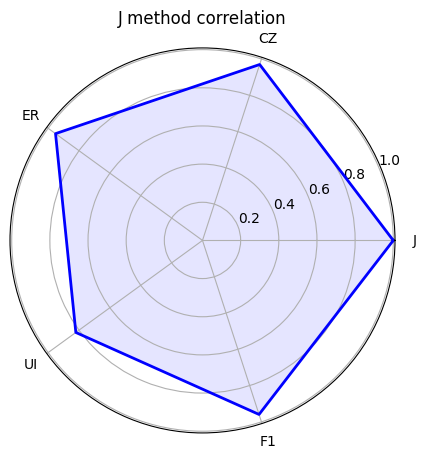

In [93]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['J', 'CZ', 'ER', 'UI', 'F1']
num_categories = len(categories)
# Create an array of evenly spaced angles to represent each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles += angles[:1]
# Create a figure and a set of polar axes
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, polar=True)
# Plot the data on the radar plot
ax.fill(angles, J_cor, 'b', alpha=0.1)  # Fill the area under the curve
ax.plot(angles, J_cor, 'b', linewidth=2)  # Plot the data points
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('J method correlation')
plt.show()


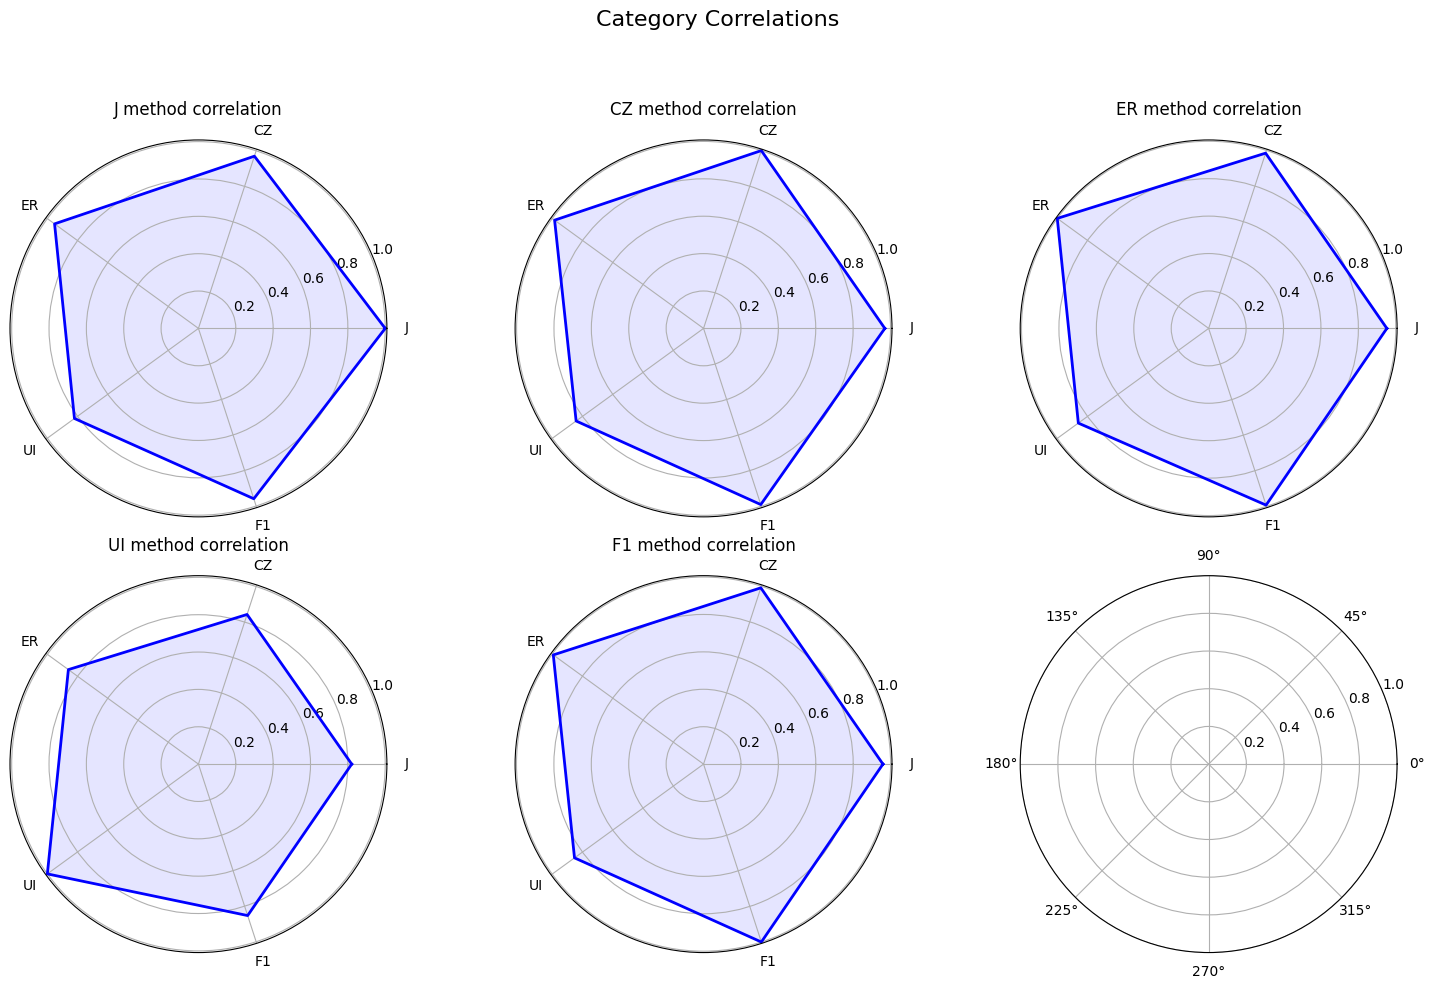

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the five categories

categories = ['J', 'CZ', 'ER', 'UI', 'F1']
num_categories = len(categories)
# Create an array of evenly spaced angles to represent each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles += angles[:1]

# Create a figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(polar=True))
fig.suptitle('Category Correlations', fontsize=16)

# Loop through the categories and create subplots
for i, (ax, category) in enumerate(zip(axes.flatten(), categories)):
    
    ax.fill(angles, eval(f'{category}_cor'), 'b', alpha=0.1)
    ax.plot(angles, eval(f'{category}_cor'), 'b', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f'{category} method correlation')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
